**# DATA EMPLORATIONA ANALYSIS**

# New Section

**Understading the Imported Stroke Data**

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [244]:
#Importing pandas library
import pandas as pd

#Loading data into a DataFrame
df=pd.read_csv(r'C:\Users\SOHAIL SONS TRADERS\Desktop\proj\Stroke-Prediction-Web-Application-main\Dataset\healthcare-dataset-stroke-data.csv')

In [245]:
# using df.info() I gained an overview of the dataframe structure such as non-null entries, data types of each column ,index range and memory usage.
# Looking at this, I can see that BMI coloumns has some absence of data compared to the rest of the coloums
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [246]:
#Overview of Stroke Dataset
display(df)

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [247]:
# Renaming the columns to give it uniformity
df = df.rename(columns={'heart_disease': 'HeartDisease',
                        'ever_married': 'EverMarried',
                        'work_type': 'WorkType',
                        'avg_glucose_level': 'AverageGlucoseLevel',
                        'smoking_status': 'SmokingStatus',
                        'hypertension': 'Hypertension',
                        'bmi': 'BMI',
                        'Residence_type': 'ResidenceType',
                        'stroke': 'Stroke',
                        'age':'Age',
                        'gender':'Gender'
                       })


In [248]:

#Examing the first ten rows for chaange in dataset after renaming columns

display(df.head(10))


id  Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
0   9046    Male  67.0             0             1         Yes        Private   
1  51676  Female  61.0             0             0         Yes  Self-employed   
2  31112    Male  80.0             0             1         Yes        Private   
3  60182  Female  49.0             0             0         Yes        Private   
4   1665  Female  79.0             1             0         Yes  Self-employed   
5  56669    Male  81.0             0             0         Yes        Private   
6  53882    Male  74.0             1             1         Yes        Private   
7  10434  Female  69.0             0             0          No        Private   
8  27419  Female  59.0             0             0         Yes        Private   
9  60491  Female  78.0             0             0         Yes        Private   

  ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0         Urban               228.69  36.6  formerly smoked       1  
1         Rural               202.21   NaN     never smoked       1  
2         Rural               105.92  32.5     never smoked       1  
3         Urban               171.23  34.4           smokes       1  
4         Rural               174.12  24.0     never smoked       1  
5         Urban               186.21  29.0  formerly smoked       1  
6         Rural                70.09  27.4     never smoked       1  
7         Urban                94.39  22.8     never smoked       1  
8         Rural                76.15   NaN          Unknown       1  
9         Urban                58.57  24.2          Unknown       1

In [249]:
#Verifying the number of Coloumn and Rows count in the stroke dataset

df.shape

(5110, 12)

In [250]:
#Dislay coloums only to get a close insight

df.columns

Index(['id', 'Gender', 'Age', 'Hypertension', 'HeartDisease', 'EverMarried',
       'WorkType', 'ResidenceType', 'AverageGlucoseLevel', 'BMI',
       'SmokingStatus', 'Stroke'],
      dtype='object')

In [251]:
#Upon inspection I droped id column as it is not assoiated with risk factor for stroke and has no signifance in my project

df.drop(columns=['id'], inplace=True)

In [252]:
# Using the output below, after deleting the Id,These are the columns I will be using for my
#model predictions as they are as a contributting factors to stoke

display(list(df.columns))


['Gender',
 'Age',
 'Hypertension',
 'HeartDisease',
 'EverMarried',
 'WorkType',
 'ResidenceType',
 'AverageGlucoseLevel',
 'BMI',
 'SmokingStatus',
 'Stroke']

In [253]:
#My dataset now contain 11 columns after Id coloums was removed
df.shape

(5110, 11)

In [254]:
#examing the first ten rows for change in dataset after remonving ID column
display(df.head(10))


Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
0    Male  67.0             0             1         Yes        Private   
1  Female  61.0             0             0         Yes  Self-employed   
2    Male  80.0             0             1         Yes        Private   
3  Female  49.0             0             0         Yes        Private   
4  Female  79.0             1             0         Yes  Self-employed   
5    Male  81.0             0             0         Yes        Private   
6    Male  74.0             1             1         Yes        Private   
7  Female  69.0             0             0          No        Private   
8  Female  59.0             0             0         Yes        Private   
9  Female  78.0             0             0         Yes        Private   

  ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0         Urban               228.69  36.6  formerly smoked       1  
1         Rural               202.21   NaN     never smoked       1  
2         Rural               105.92  32.5     never smoked       1  
3         Urban               171.23  34.4           smokes       1  
4         Rural               174.12  24.0     never smoked       1  
5         Urban               186.21  29.0  formerly smoked       1  
6         Rural                70.09  27.4     never smoked       1  
7         Urban                94.39  22.8     never smoked       1  
8         Rural                76.15   NaN          Unknown       1  
9         Urban                58.57  24.2          Unknown       1

In [255]:
# I examine the first 10 rows of the dataset just to obtain a general overview of the dataand to see if previous changes has been adjusted

In [256]:
# I examine the last 10 rows of the dataset just to obtain a general overview of the dataand to see if previous changes has been adjusted
display(df.tail(10))

Gender   Age  Hypertension  HeartDisease EverMarried       WorkType  \
5100    Male  82.0             1             0         Yes  Self-employed   
5101  Female  45.0             0             0         Yes        Private   
5102  Female  57.0             0             0         Yes        Private   
5103  Female  18.0             0             0          No        Private   
5104  Female  13.0             0             0          No       children   
5105  Female  80.0             1             0         Yes        Private   
5106  Female  81.0             0             0         Yes  Self-employed   
5107  Female  35.0             0             0         Yes  Self-employed   
5108    Male  51.0             0             0         Yes        Private   
5109  Female  44.0             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
5100         Rural                71.97  28.3     never smoked       0  
5101         Urban                97.95  24.5          Unknown       0  
5102         Rural                77.93  21.7     never smoked       0  
5103         Urban                82.85  46.9          Unknown       0  
5104         Rural               103.08  18.6          Unknown       0  
5105         Urban                83.75   NaN     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  30.6     never smoked       0  
5108         Rural               166.29  25.6  formerly smoked       0  
5109         Urban                85.28  26.2          Unknown       0

In [257]:
df.describe()

Age  Hypertension  HeartDisease  AverageGlucoseLevel  \
count  5110.000000   5110.000000   5110.000000          5110.000000   
mean     43.226614      0.097456      0.054012           106.147677   
std      22.612647      0.296607      0.226063            45.283560   
min       0.080000      0.000000      0.000000            55.120000   
25%      25.000000      0.000000      0.000000            77.245000   
50%      45.000000      0.000000      0.000000            91.885000   
75%      61.000000      0.000000      0.000000           114.090000   
max      82.000000      1.000000      1.000000           271.740000   

               BMI       Stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

In [258]:
# The decribe code displayed the summary statistics, including count, mean, standard deviation, minimum, 25th, 50th (median), 75th percentiles, and maximum for each numeric column in the DataFrame.
# For exampole, It shows that the average age in the dataset is approximately 43.
# It shows there is a diverse age group which ranges from 0.08 to 82, with most of age group falling between 25 and 61.


**ROUNDING** **UP** **DECIMAL** **COLOUMNS** **TO** **WHOLE NUMBER**

In [259]:
df['Age'] = df['Age'].round().astype(int)
print(df)

      Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            U

In [260]:
# The changes has been reflected below showing all categorised values changed to numeric values
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            Urban               228.69  36.6  formerly smoked       1  
1            Rural               202.21   NaN     never smoked       1  
2            Rural               105.92  32.5     never smoked       1  
3            Urban               171.23  34.4           smokes       1  
4            Rural               174.12  24.0     never smoked       1  
...            ...                  ...   ...              ...     ...  
5105         Urban                83.75   NaN     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  30.6     never smoked       0  
5108         Rural               166.29  25.6  formerly smoked       0  
5109         Urban                85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

**CLEANING** **THE** **DATA**

In [261]:
#Looking for missing values

In [262]:
df.isnull( ).sum()

Gender                   0
Age                      0
Hypertension             0
HeartDisease             0
EverMarried              0
WorkType                 0
ResidenceType            0
AverageGlucoseLevel      0
BMI                    201
SmokingStatus            0
Stroke                   0
dtype: int64

In [263]:
#Found 201 missing values but I will opt to treat it usig simple Imputation

In [264]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)


C:\Users\SOHAIL SONS TRADERS\AppData\Local\Temp\ipykernel_9516\1834128554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace=True)


In [265]:
#After treatment i am confirming there is no longer any null values

In [266]:
df.isnull().sum()

Gender                 0
Age                    0
Hypertension           0
HeartDisease           0
EverMarried            0
WorkType               0
ResidenceType          0
AverageGlucoseLevel    0
BMI                    0
SmokingStatus          0
Stroke                 0
dtype: int64

In [267]:
# Missing data in the 'bmi/ has now been filled. As seen above all columns now have (0) missing values
# Rather than to avoid,ignore or top up, I applied the 'Treat' option as a way of dealing with the missing data
#To achieve this, I used 'simple imputation' method, which is using statistical methods for replacing missing values with the mean of BMI variables

In [268]:
#Percentages of missing data
df.isna().sum()/len(df)*100

Gender                 0.0
Age                    0.0
Hypertension           0.0
HeartDisease           0.0
EverMarried            0.0
WorkType               0.0
ResidenceType          0.0
AverageGlucoseLevel    0.0
BMI                    0.0
SmokingStatus          0.0
Stroke                 0.0
dtype: float64

In [269]:
BMI_mean = df['BMI'].mean()
df['BMI'].fillna(BMI_mean, inplace=True)

C:\Users\SOHAIL SONS TRADERS\AppData\Local\Temp\ipykernel_9516\2067484991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(BMI_mean, inplace=True)


In [270]:
#Examining the work type column and changing the children row to never worked as children
selected_column = df.WorkType
selected_column

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: WorkType, Length: 5110, dtype: object

In [271]:
#Looking at the output above, we have children as a working type, this cannot be true becuase studying the result from the desciption on age,
# The data was mainly focused on individual on the working age as the average age with a range of 25-61 years
#in this case, I will change the 'Children' vlues as never worked

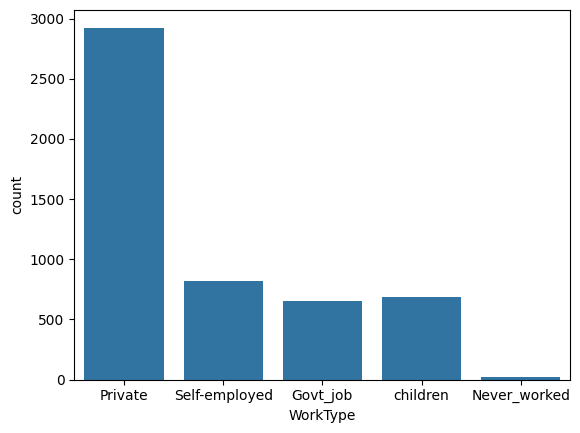

In [272]:
sns.countplot(x='WorkType', data=df)
plt.show()

In [273]:
df['WorkType'] = df['WorkType'].replace('children', 'Never_worked')

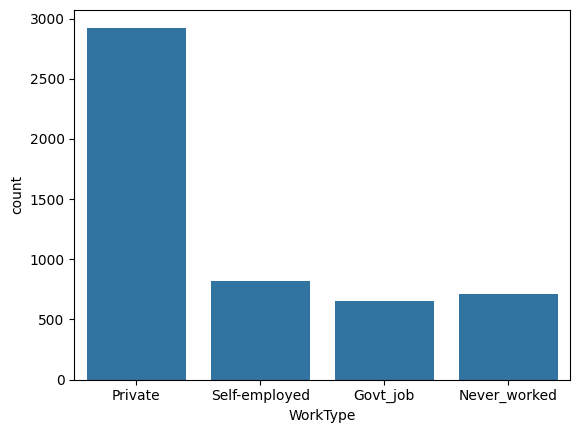

In [274]:
sns.countplot(x='WorkType', data=df)
plt.show()

In [275]:
#from the result above, the number of Never worked has gone up after the change

In [276]:
#Examining the smoking status column
selected_column = df.SmokingStatus
selected_column

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: SmokingStatus, Length: 5110, dtype: object

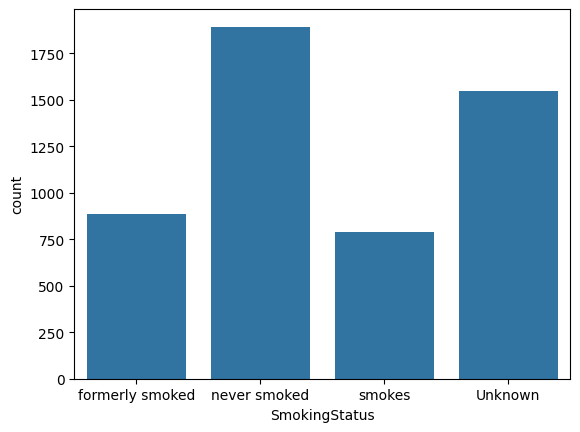

In [277]:
sns.countplot(x='SmokingStatus', data=df)
plt.show()

In [278]:
#There seems to a high percetahe of Unknown smoking status here.
#Unknown was changed to neversmoked

df['SmokingStatus'] = df['SmokingStatus'].replace('Unknown', 'never smoked')

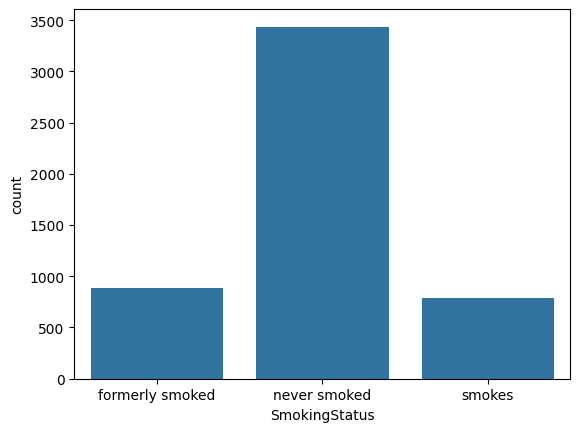

In [279]:
sns.countplot(x='SmokingStatus', data=df)
plt.show()

In [280]:
#Examining the Age column
selected_column = df.Age
selected_column

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: Age, Length: 5110, dtype: int32

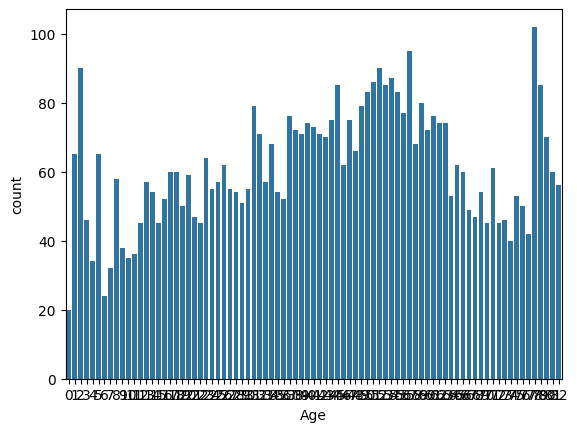

In [281]:
sns.countplot(x='Age', data=df)
plt.show()


In [282]:
 #Convert age values to integers, which will remove the decimal part
df['Age'] = df['Age'].astype(int)


In [283]:
#some of the input there are decmal so I change to interger

In [284]:
#i display to see the new changes to Age coloumn
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel        BMI    SmokingStatus  Stroke  
0            Urban               228.69  36.600000  formerly smoked       1  
1            Rural               202.21  28.893237     never smoked       1  
2            Rural               105.92  32.500000     never smoked       1  
3            Urban               171.23  34.400000           smokes       1  
4            Rural               174.12  24.000000     never smoked       1  
...            ...                  ...        ...              ...     ...  
5105         Urban                83.75  28.893237     never smoked       0  
5106         Urban               125.20  40.000000     never smoked       0  
5107         Rural                82.99  30.600000     never smoked       0  
5108         Rural               166.29  25.600000  formerly smoked       0  
5109         Urban                85.28  26.200000     never smoked       0  

[5110 rows x 11 columns]

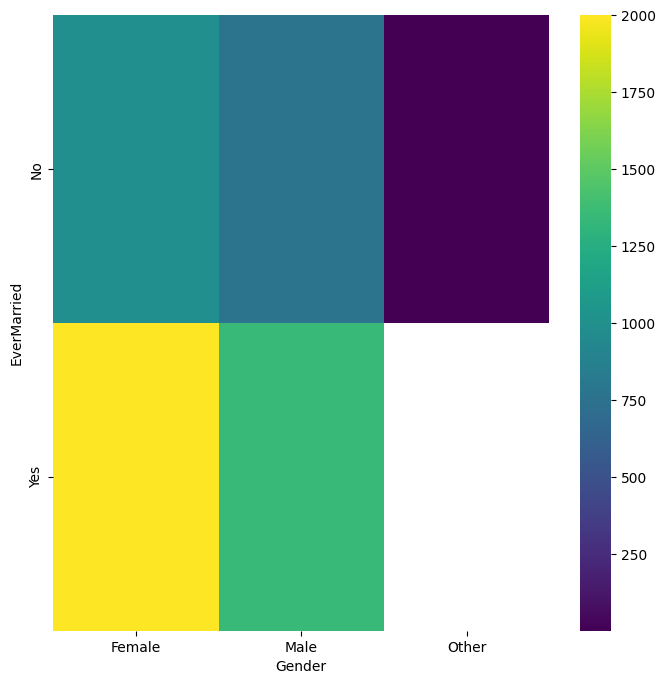

In [285]:
# @title gender vs ever_married

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EverMarried'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('EverMarried')

In [286]:
#age coloumn is not showing whole mubers

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

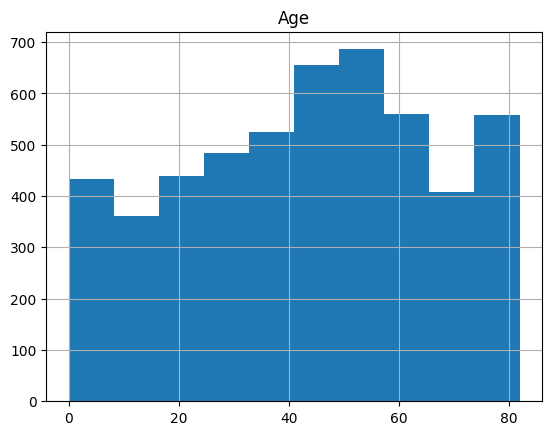

In [287]:
df.hist(column='Age')

In [288]:
#Examining the Gender column
selected_column = df.Gender
selected_column

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: Gender, Length: 5110, dtype: object

In [289]:
Gender_counts = df['Gender'].value_counts()
print(Gender_counts)

Gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


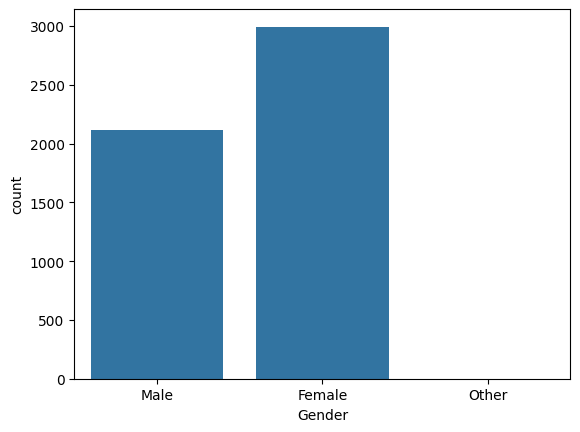

In [290]:
sns.countplot(x='Gender', data=df)
plt.show()

In [291]:
# this outcome indicate that we have some other type of gender but it is not clear what specific gender it is . Given that we only have 2 scientic gender, also since you cannot quatify the other
#or classify it , i will remove it to avoid it


In [292]:
df = df[df['Gender'] != 'Other']

In [293]:
df.shape

(5109, 11)

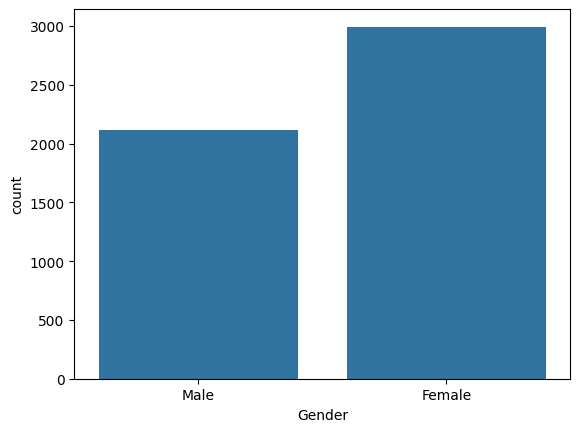

In [294]:
sns.countplot(x='Gender', data=df)
plt.show()

In [295]:
#he correlation coefficient between 'age' and 'hypertension' is 0.254545, shows a positive correlation, but not very strong.
#The correlation coefficient between 'heart_disease' and 'bmi' is -0.003140, suggesting a very weak negative correlation.
#The correlation coefficient between 'avg_glucose_level' and 'stroke' is 0.129297, indicating a positive correlation, though not very strong.

**VISUALISATION**

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

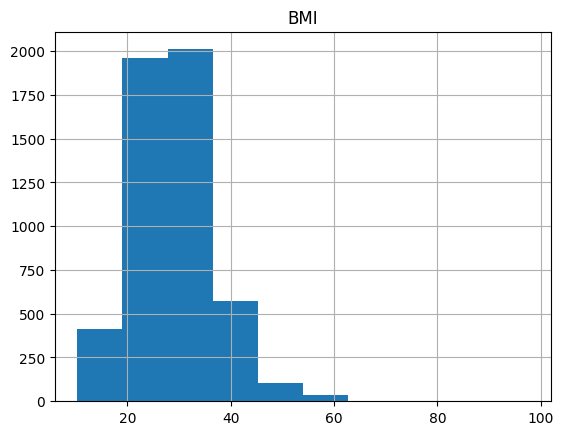

In [296]:
df.hist(column='BMI')

array([[<Axes: title={'center': 'Hypertension'}>]], dtype=object)

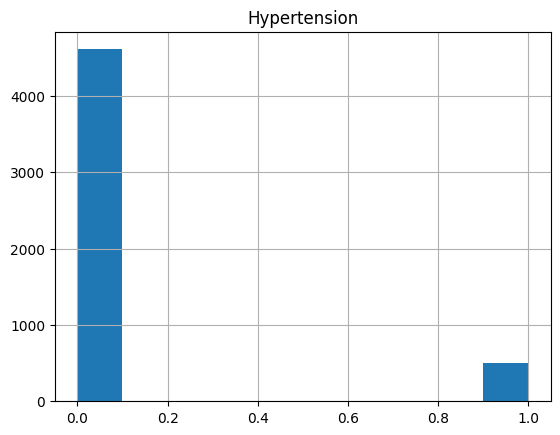

In [297]:
df.hist(column='Hypertension')

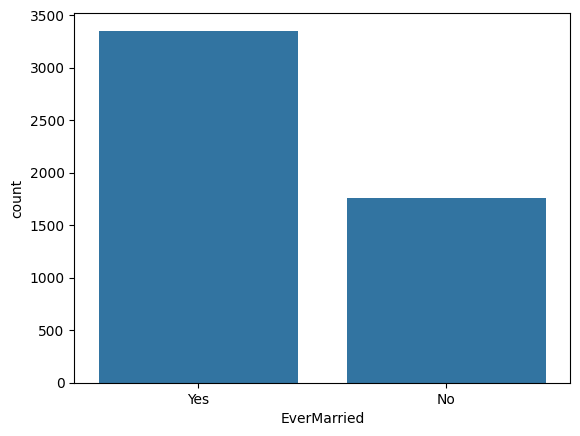

In [298]:

sns.countplot(x='EverMarried', data=df)
plt.show()


In [299]:
#ever married output

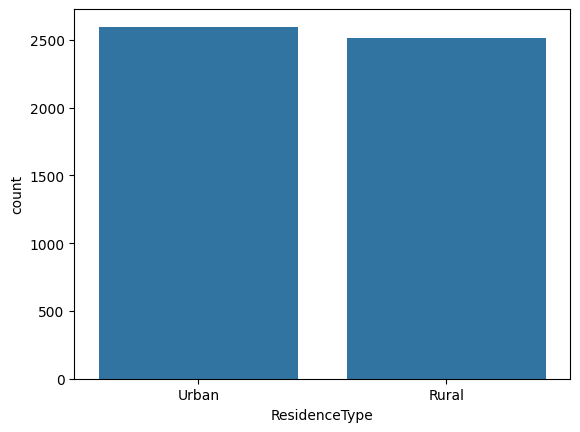

In [300]:
sns.countplot(x='ResidenceType', data=df)
plt.show()

array([[<Axes: title={'center': 'AverageGlucoseLevel'}>]], dtype=object)

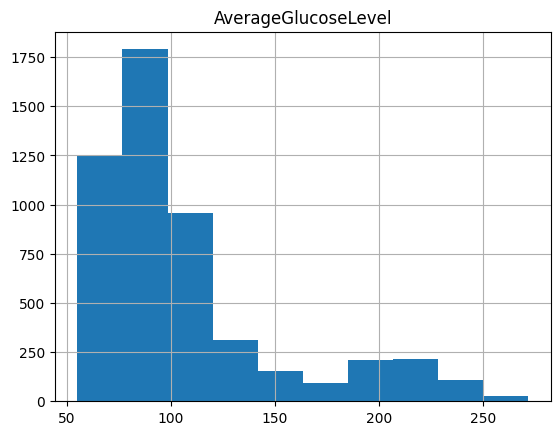

In [301]:
df.hist(column='AverageGlucoseLevel')

array([[<Axes: title={'center': 'HeartDisease'}>]], dtype=object)

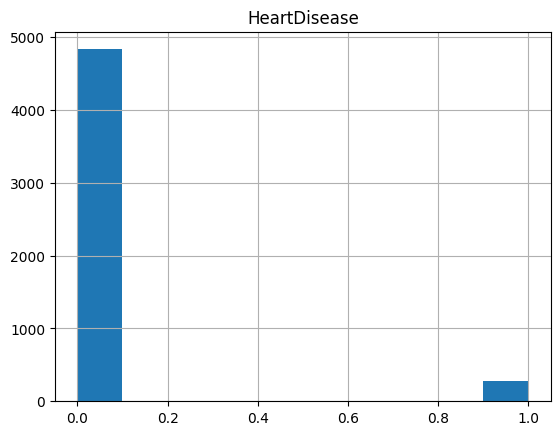

In [302]:
df.hist(column='HeartDisease')

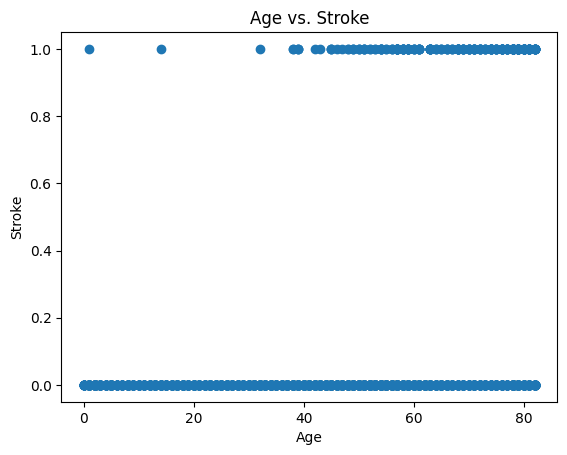

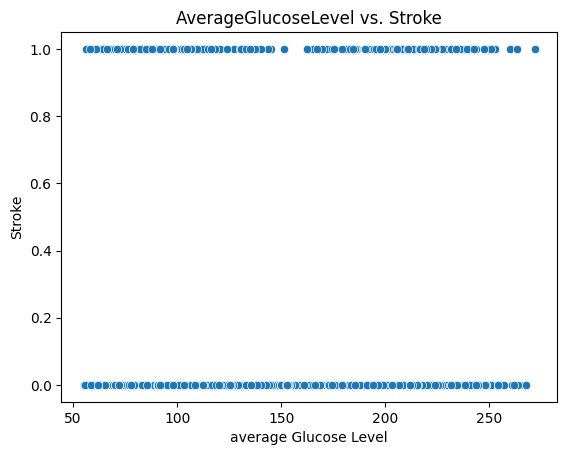

In [303]:
# Example of creating a scatter plot using Matplotlib
plt.scatter(df['Age'], df['Stroke'])
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.title('Age vs. Stroke')
plt.show()

# Example of creating a scatter plot using Seaborn
sns.scatterplot(x='AverageGlucoseLevel', y='Stroke', data=df)
plt.xlabel('average Glucose Level')
plt.ylabel('Stroke')
plt.title('AverageGlucoseLevel vs. Stroke')
plt.show()

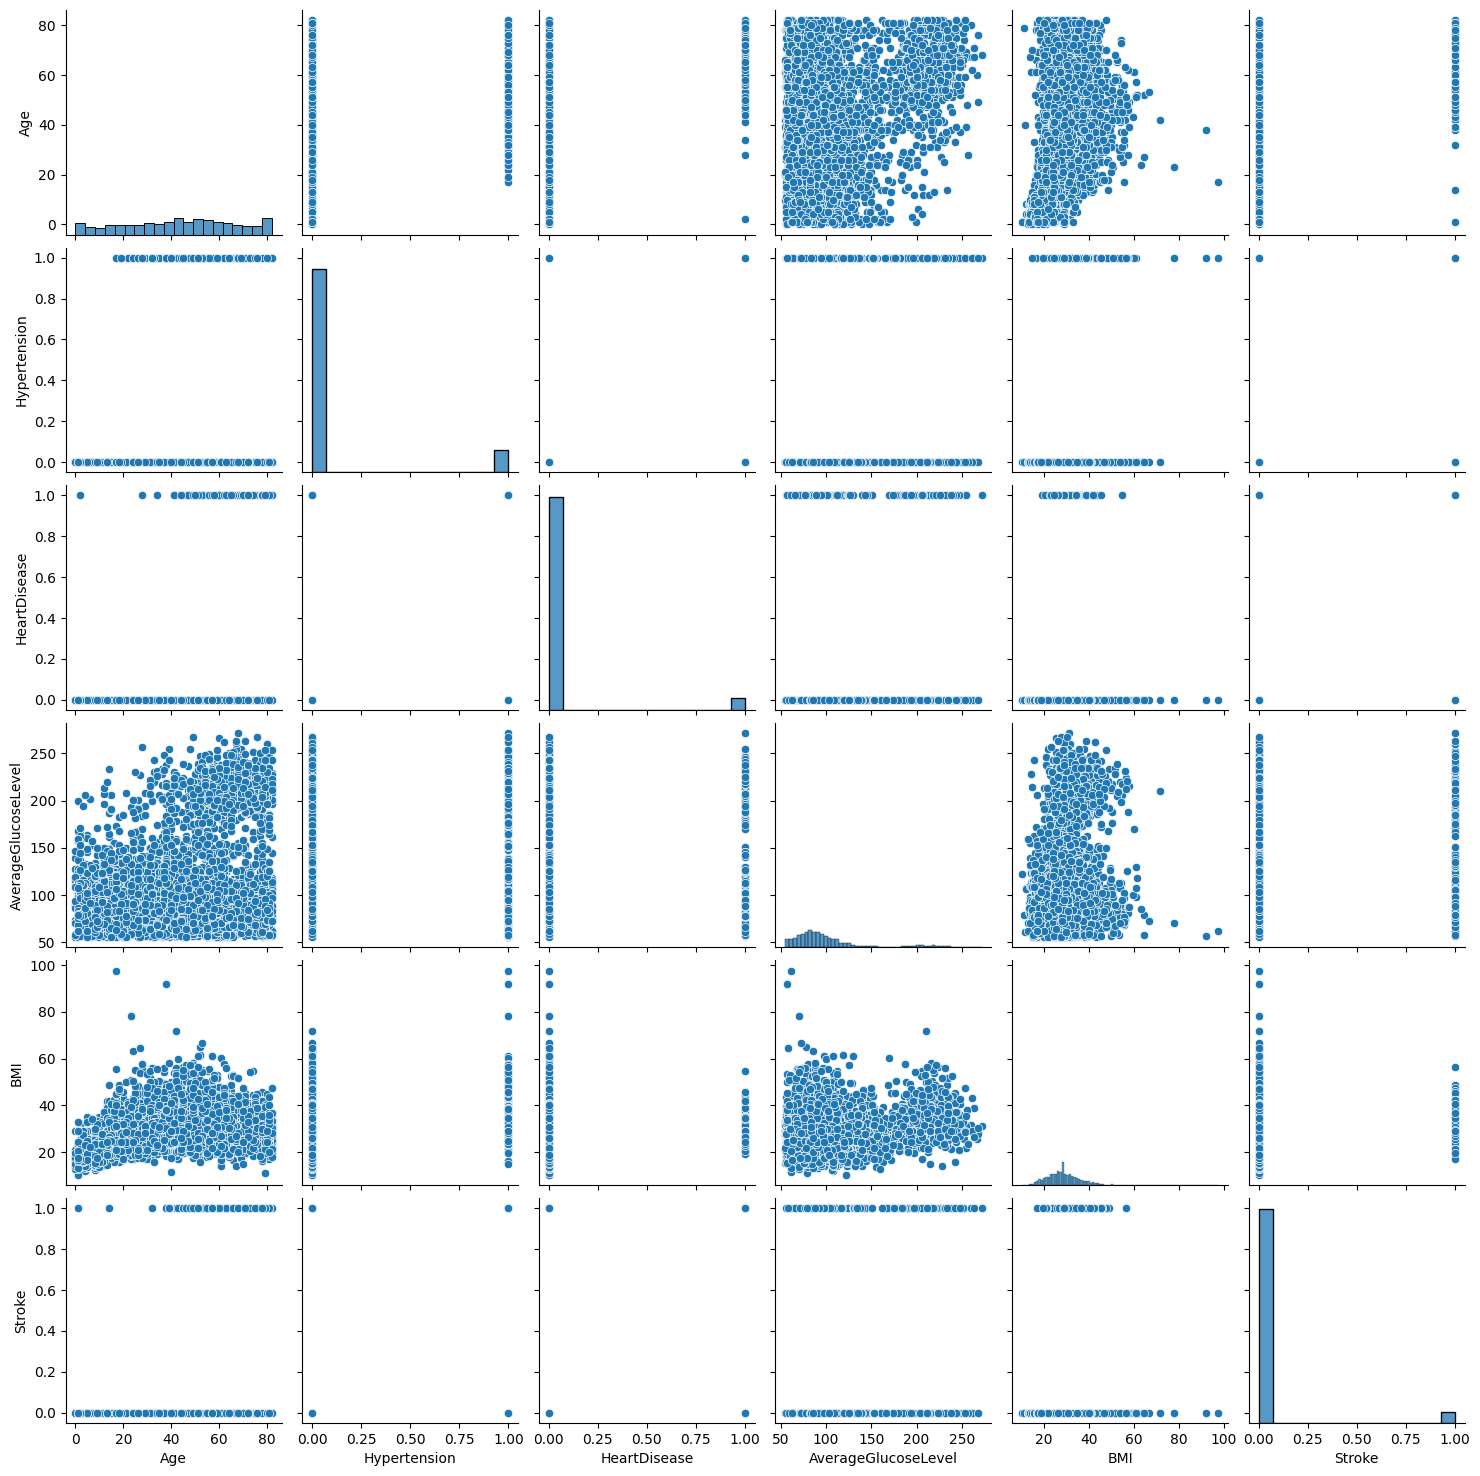

In [304]:
#Summary
sns.pairplot(df)


In [305]:
#  pip install numpy

In [306]:
# Round up 'BMI' values
df['BMI'] = np.ceil(df['BMI'])

# Revert back to original format
pd.options.display.float_format = None

In [307]:
display(df)

Gender  Age  Hypertension  HeartDisease EverMarried       WorkType  \
0       Male   67             0             1         Yes        Private   
1     Female   61             0             0         Yes  Self-employed   
2       Male   80             0             1         Yes        Private   
3     Female   49             0             0         Yes        Private   
4     Female   79             1             0         Yes  Self-employed   
...      ...  ...           ...           ...         ...            ...   
5105  Female   80             1             0         Yes        Private   
5106  Female   81             0             0         Yes  Self-employed   
5107  Female   35             0             0         Yes  Self-employed   
5108    Male   51             0             0         Yes        Private   
5109  Female   44             0             0         Yes       Govt_job   

     ResidenceType  AverageGlucoseLevel   BMI    SmokingStatus  Stroke  
0            Urban               228.69  37.0  formerly smoked       1  
1            Rural               202.21  29.0     never smoked       1  
2            Rural               105.92  33.0     never smoked       1  
3            Urban               171.23  35.0           smokes       1  
4            Rural               174.12  24.0     never smoked       1  
...            ...                  ...   ...              ...     ...  
5105         Urban                83.75  29.0     never smoked       0  
5106         Urban               125.20  40.0     never smoked       0  
5107         Rural                82.99  31.0     never smoked       0  
5108         Rural               166.29  26.0  formerly smoked       0  
5109         Urban                85.28  27.0     never smoked       0  

[5109 rows x 11 columns]

**ENCODING** **CATERGORICAL** **COLUMNS** **VALUES** **INTO** **NUMERICAL**

In [308]:
label_encoder = LabelEncoder()

# Encode categorical columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EverMarried'] = label_encoder.fit_transform(df['EverMarried'])
df['WorkType'] = label_encoder.fit_transform(df['WorkType'])
df['SmokingStatus'] = label_encoder.fit_transform(df['SmokingStatus'])
df['ResidenceType'] = label_encoder.fit_transform(df['ResidenceType'])

In [309]:
display(df)

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0          1   67             0             1            1         2   
1          0   61             0             0            1         3   
2          1   80             0             1            1         2   
3          0   49             0             0            1         2   
4          0   79             1             0            1         3   
...      ...  ...           ...           ...          ...       ...   
5105       0   80             1             0            1         2   
5106       0   81             0             0            1         3   
5107       0   35             0             0            1         3   
5108       1   51             0             0            1         2   
5109       0   44             0             0            1         0   

      ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0                 1               228.69  37.0              0       1  
1                 0               202.21  29.0              1       1  
2                 0               105.92  33.0              1       1  
3                 1               171.23  35.0              2       1  
4                 0               174.12  24.0              1       1  
...             ...                  ...   ...            ...     ...  
5105              1                83.75  29.0              1       0  
5106              1               125.20  40.0              1       0  
5107              0                82.99  31.0              1       0  
5108              0               166.29  26.0              0       0  
5109              1                85.28  27.0              1       0  

[5109 rows x 11 columns]

In [310]:
df.shape

(5109, 11)

In [311]:
df.to_csv('Stroke.csv', index=False)

**Building kNeighbours**(k-NN)**Model

**Split** **up** **the** **dataset** **into** **features** **and** **target**

In [312]:
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension','HeartDisease','AverageGlucoseLevel','EverMarried','WorkType','ResidenceType','SmokingStatus']

X = df[feature_cols]
#check that the target variable has been removed
X.head()


Gender  Age   BMI  Hypertension  HeartDisease  AverageGlucoseLevel  \
0       1   67  37.0             0             1               228.69   
1       0   61  29.0             0             0               202.21   
2       1   80  33.0             0             1               105.92   
3       0   49  35.0             0             0               171.23   
4       0   79  24.0             1             0               174.12   

   EverMarried  WorkType  ResidenceType  SmokingStatus  
0            1         2              1              0  
1            1         3              0              1  
2            1         2              0              1  
3            1         2              1              2  
4            1         3              0              1

In [313]:
#split up dataset into inputs (X) and our target (y).

In [314]:

#separate target values
y = df['Stroke'].values
#view target values
y[0:5]


array([1, 1, 1, 1, 1], dtype=int64)

**split** **up** **dataset** **into** **inputs** **bold text**(X) **and** **our** **target** (y).

In [315]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


**Building** **and** **training** **the** **model**

In [316]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**TESTING** **THE** **MoDEL**

In [317]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [318]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)



0.9442270058708415

## F1 score and precision of a k-Nearest Neighbors (KNN) classifier

In [319]:
from sklearn.metrics import f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier



y_pred = knn.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)


F1 Score: 0.09523809523809523
Precision: 0.23076923076923078


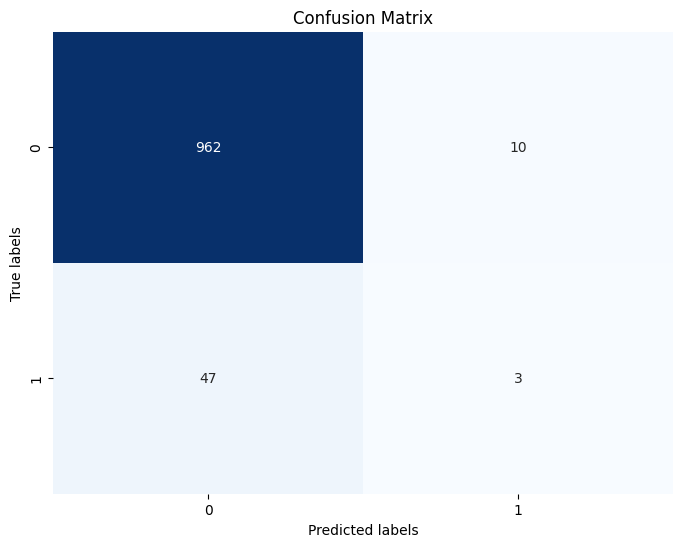

In [320]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming knn is your trained K-NN model
predictions = knn.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [321]:
# df.to_csv(r'/Stroke.csv', index=False)

**Modelling** **with** **Decision** **Trees** **Algorithms**

In [322]:
 #Decision Tree Classifier Building in Scikit-learn

In [323]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [324]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv('Stroke.csv')
pima.head()


Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0              1               228.69  37.0              0       1  
1              0               202.21  29.0              1       1  
2              0               105.92  33.0              1       1  
3              1               171.23  35.0              2       1  
4              0               174.12  24.0              1       1

**Feature** Selection (Define the X_columns and the y_column)**bold text**

In [325]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension','HeartDisease','AverageGlucoseLevel','EverMarried','WorkType','ResidenceType','SmokingStatus']
X = pima[feature_cols]
y = pima.Stroke # Target variable


**Splitting** **Data** **in** **to** **training** **and** **test** **sets**

In [326]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [327]:
from imblearn.over_sampling import SMOTE

In [328]:
smote=SMOTE(random_state=1)
X_train_new,y_train_new=smote.fit_resample(X_train,y_train)


**Building Decision Tree Model**

In [329]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [330]:
# Create Decision tree with SMOTE
new_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
new_clf = new_clf.fit(X_train_new,y_train_new)
#Predict the response for test dataset
y_pred = new_clf.predict(X_test)


**Evaluating** **Model**

In [331]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8649706457925636


## F1 score and precision of Decision Tree classifer

In [332]:
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)

F1 Score: 0.1590909090909091
Precision: 0.15053763440860216


In [333]:
#Well, you got a classification rate of 71.8%, which is considered good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

In [334]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(200,200))
DT_Graph = tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)


In [335]:
#Optimising Decision Tree Performance

In [336]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9458577951728636


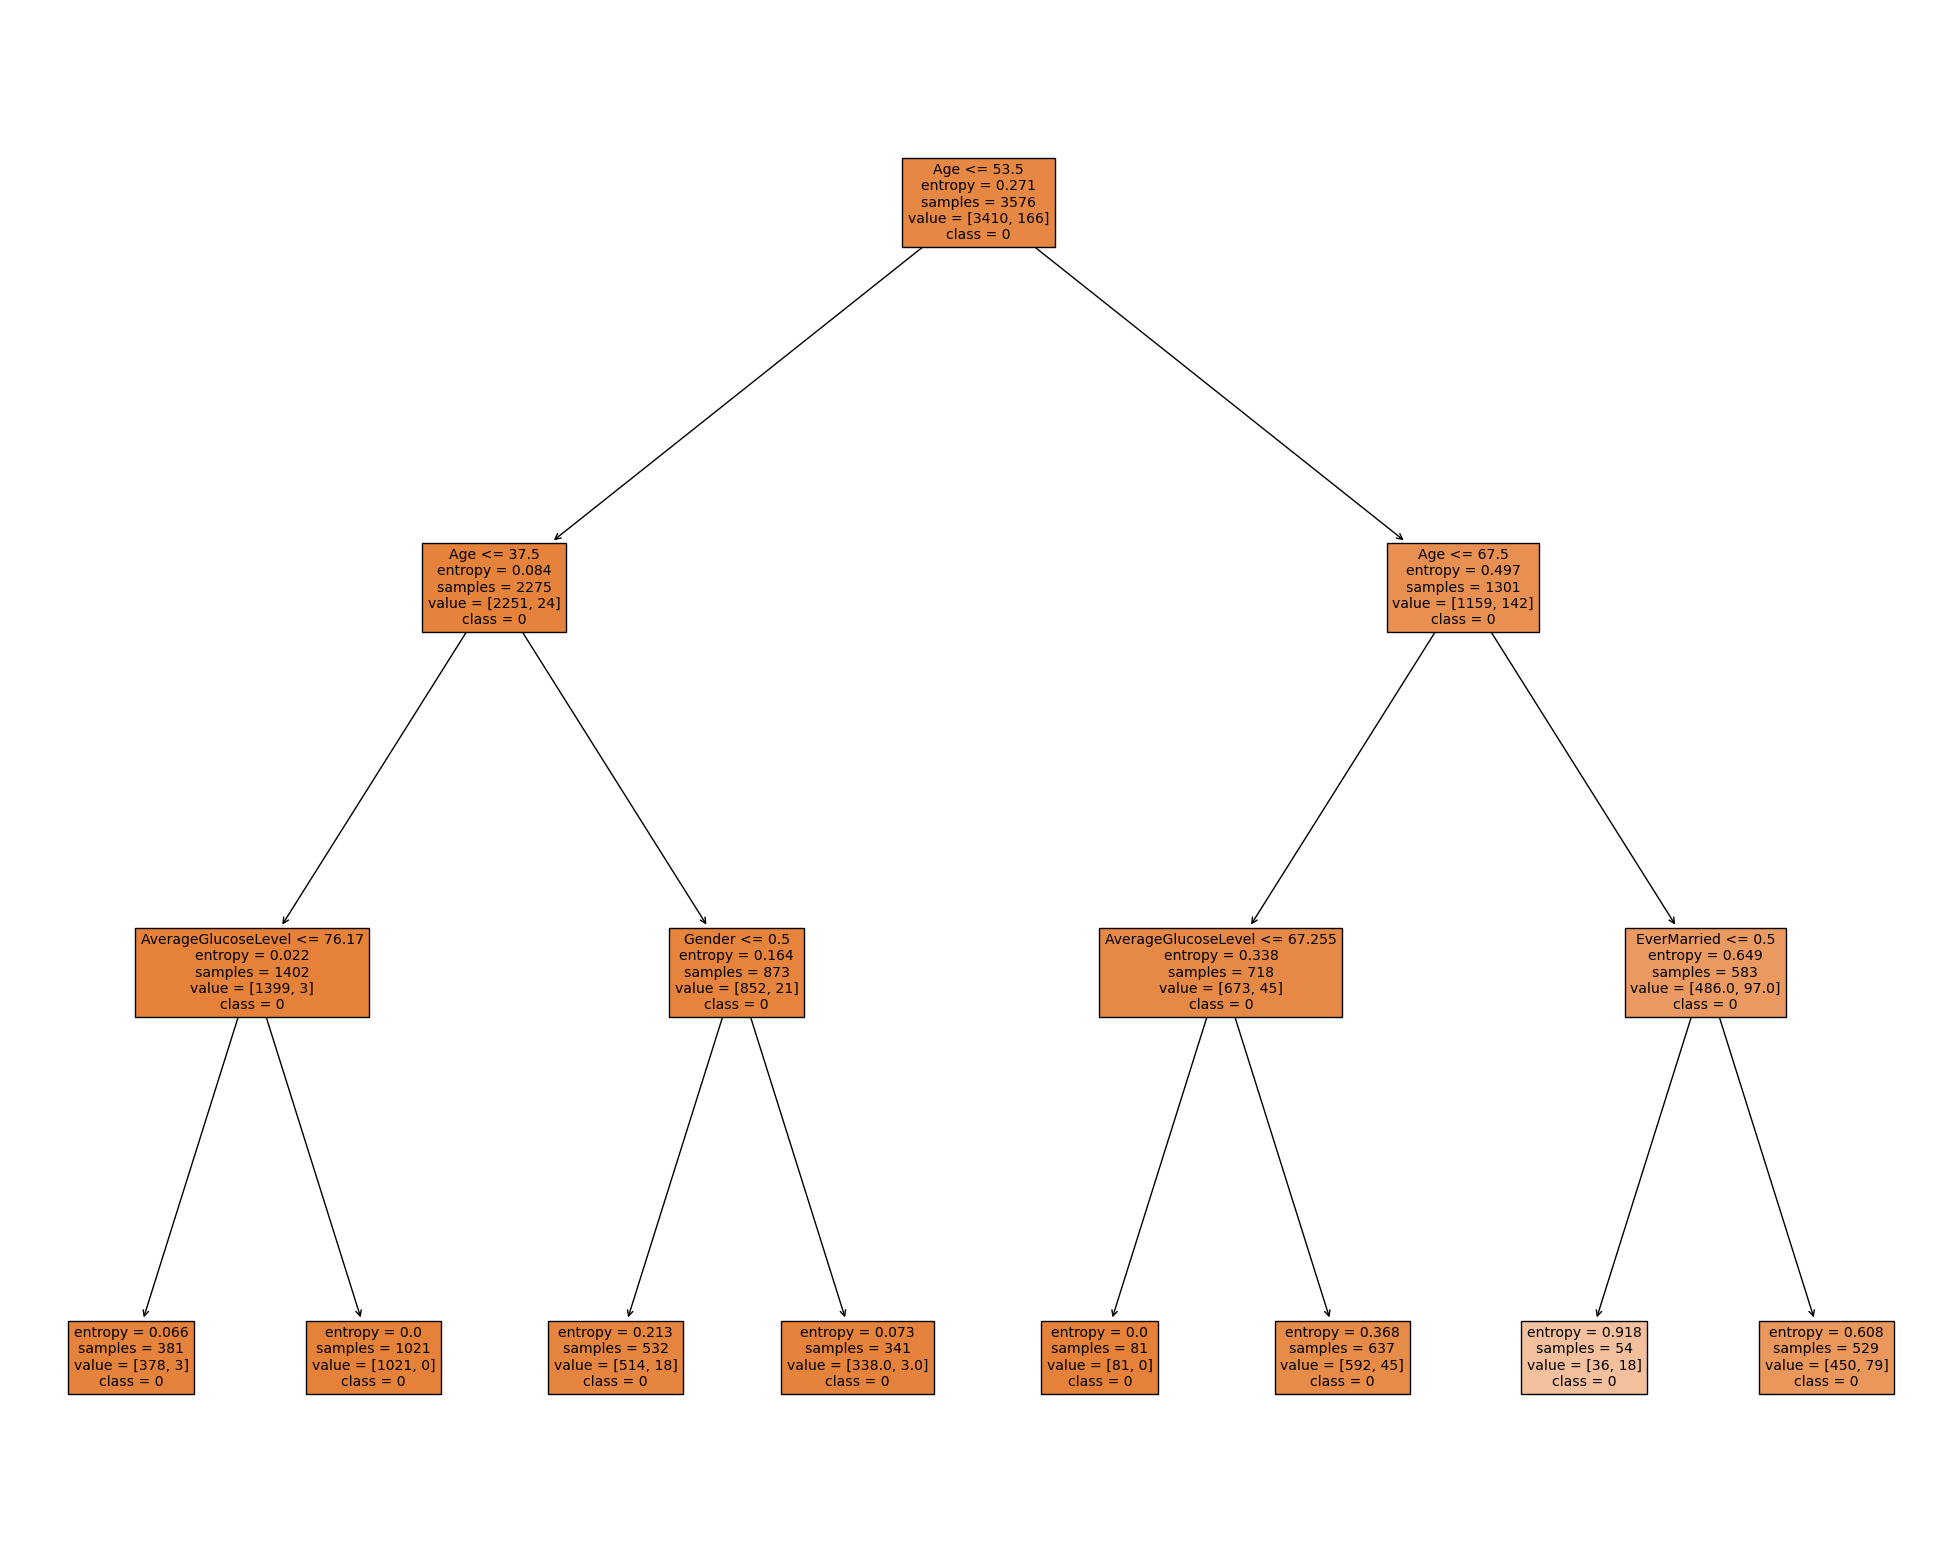

In [337]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
DT_Graph_pruned = tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'],filled=True)


In [338]:
#Visualising the Confusion Matrix of the Pruned Decision Tree

In [339]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


0.9458577951728636


array([[1450,    0],
       [  83,    0]], dtype=int64)

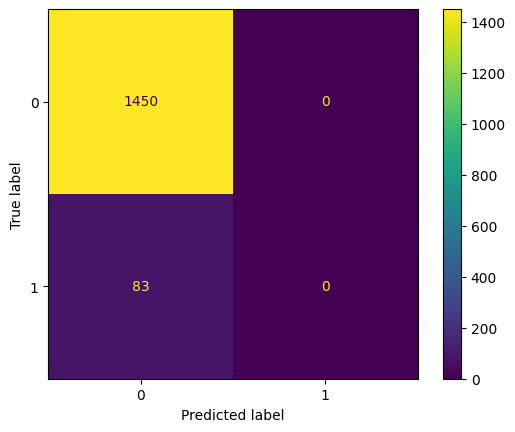

In [340]:
# An easier way to plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()


**Logistic** **Reegression**

In [341]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv('Stroke.csv')
pima.head()


Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0              1               228.69  37.0              0       1  
1              0               202.21  29.0              1       1  
2              0               105.92  33.0              1       1  
3              1               171.23  35.0              2       1  
4              0               174.12  24.0              1       1

In [342]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension','HeartDisease','AverageGlucoseLevel','EverMarried','WorkType','ResidenceType','SmokingStatus']
X = pima[feature_cols] # Features
y = pima.Stroke # Target variable

In [343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)


In [344]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)


In [345]:
#Model Development and Prediction

In [346]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

y_pred=logreg.predict(X1_test)


In [347]:
#Model Evaluation using Confusion Matrix

In [348]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)



0.9491392801251957


In [ ]:
#Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

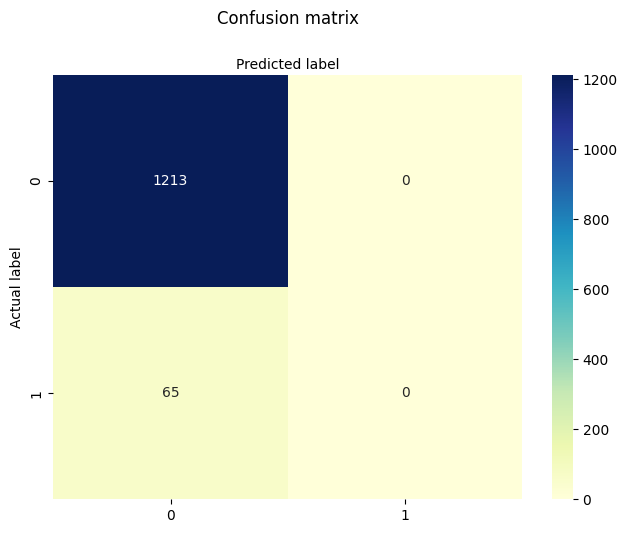

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9491392801251957
Precision: 0.0
Recall: 0.0


c:\Users\SOHAIL SONS TRADERS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df.to_csv(r'/Stroke.csv', index=False)

# RandomForestClassifier

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 2: Load the dataset
pima = pd.read_csv('Stroke.csv')
pima.head()

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0              1               228.69  37.0              0       1  
1              0               202.21  29.0              1       1  
2              0               105.92  33.0              1       1  
3              1               171.23  35.0              2       1  
4              0               174.12  24.0              1       1

In [ ]:
# Step 3: Select feature columns and target column
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension','HeartDisease','AverageGlucoseLevel','EverMarried','WorkType','ResidenceType','SmokingStatus']

target_col = 'Stroke'


In [ ]:
# Step 4: Split the data into features and target
X = pima[feature_cols]
y = pima[target_col]


In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Build the RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Step 7: Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9373776908023483


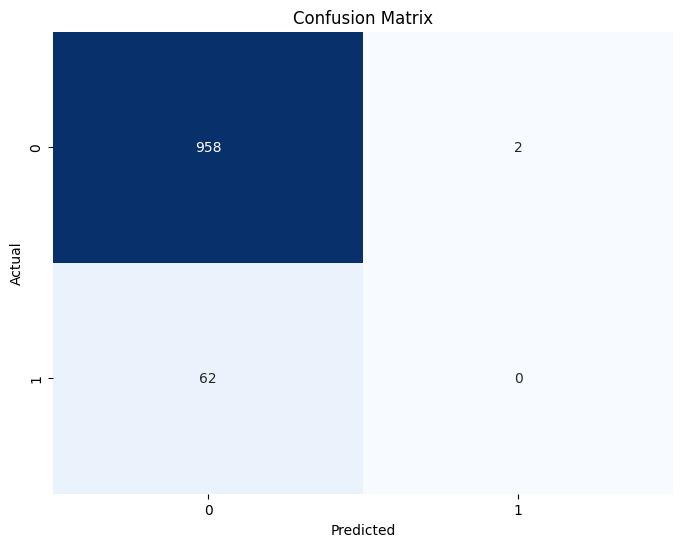

In [ ]:
# Step 9: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##  F1 score and precision for a Random Forest classifier

In [ ]:
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)

F1 Score: 0.031746031746031744
Precision: 1.0


# Support Vector Machine (SVM) 

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Step 2: Load the Dataset

pima = pd.read_csv("stroke.csv")
pima.head()

Gender  Age  Hypertension  HeartDisease  EverMarried  WorkType  \
0       1   67             0             1            1         2   
1       0   61             0             0            1         3   
2       1   80             0             1            1         2   
3       0   49             0             0            1         2   
4       0   79             1             0            1         3   

   ResidenceType  AverageGlucoseLevel   BMI  SmokingStatus  Stroke  
0              1               228.69  37.0              0       1  
1              0               202.21  29.0              1       1  
2              0               105.92  33.0              1       1  
3              1               171.23  35.0              2       1  
4              0               174.12  24.0              1       1

In [ ]:
# Step 3: Extract Features and Target Variable
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension','HeartDisease','AverageGlucoseLevel','EverMarried','WorkType','ResidenceType','SmokingStatus']
X = pima[feature_cols]
y = pima['Stroke']


In [ ]:
# Step 4: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 6: Train the SVM Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Using radial basis function (RBF) kernel
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Step 7: Make Predictions
y_pred = svm_model.predict(X_test_scaled)



In [ ]:
# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.9393346379647749


## F1 score and precision for a Support Vector Machine (SVM) classifier

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)

F1 Score: 0.0
Precision: 0.0


c:\Users\SOHAIL SONS TRADERS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# # Model Comparison and Selection


In [ ]:
#Step 1: Calculate Accuracies of Each Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Calculate accuracies using cross-validation
accuracies = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    accuracies[name] = scores.mean()

# Display the accuracies
print("Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy}")


Accuracies:
KNN: 0.9530224178744469
Decision Tree: 0.9077575242478744
Logistic Regression: 0.9542455102901964
Random Forest: 0.9527776198328309
SVM: 0.9542455102901964


In [ ]:
# Step 2: Select the Model with the Highest Accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f"The model with the highest accuracy is '{best_model_name}' with an accuracy of {best_model_accuracy}.")

The model with the highest accuracy is 'Logistic Regression' with an accuracy of 0.9542455102901964.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
pima = pd.read_csv("Stroke.csv")

# Define feature columns and target variable
feature_cols = ['Gender', 'Age', 'BMI', 'Hypertension', 'HeartDisease', 'AverageGlucoseLevel', 'EverMarried', 'WorkType', 'ResidenceType', 'SmokingStatus']
X = pima[feature_cols]
y = pima['Stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9383561643835616


# Saving and Loading a Machine Learning Model Using Pickle

In [ ]:
import pickle

# Save the trained model to a file
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")





Model saved successfully!


In [ ]:
# Load the saved model from the file
with open('knn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
loaded_model

KNeighborsClassifier()

# Adding Values and Making Predictions with the Loaded Model







In [ ]:
# Assume you have loaded the model as loaded_model

# Define new input values
new_input = [[1, 45, 25.5, 0, 1, 120, 1, 2, 1, 1]]

# Make predictions with the loaded model
prediction = loaded_model.predict(new_input)

# Print the prediction
print("Predicted Stroke:", prediction)


Predicted Stroke: [0]
